# Stationary diffusion equation:

In [23]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import bicg, gmres, spsolve, bicgstab

import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import SDE as sde

## Problem:

$-d_x\dfrac{\partial^2 C}{\partial x^2} -d_y\dfrac{\partial^2 C}{\partial y^2} = f$


$ C\vert_{B_D} = g_{D}$


$-\mathscr{D}\dfrac{\partial C}{\partial n}\vert_{B_N} = g_{N}$


$Actual solution:  C = sin(\pi x)cos(\pi y)$ $->$ helps to find: $f ,  g_{D} ,  g_{N}$


$\mathscr{D} = \begin{pmatrix} d_x & 0 \\ 0 & d_y \end{pmatrix}$

## Functions of the right side and boundary D&N conditions:

In [25]:
def f(x, y, eps):
    """ Right side """
    return np.pi**2 * np.cos(np.pi * y) * np.sin(np.pi * x) * (1 + eps)

def g_d(x, y):
    """ Dirichlet condition function """
    return np.cos(np.pi * y) * np.sin(np.pi * x)
    
def g_n(x, y):
    """ Newman condition function """
    if x == 1:
        return np.pi * np.cos(np.pi * y)
    if y == 1:
        return 0.0
    assert False # catch problems

## Solution:

### Eps = 1; order = 2:

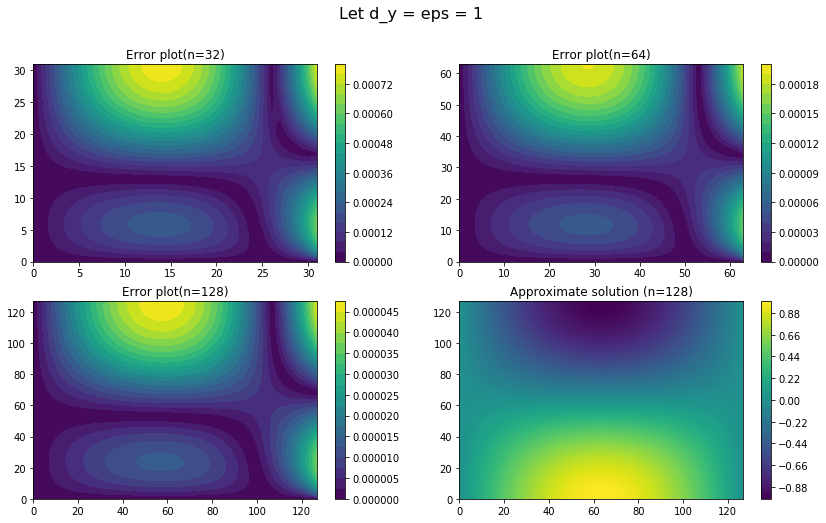

In [26]:
sde.plot(
    f,
    g_d,
    g_n,
    eps=1,
    solver=sde.SDE2,
    mode=1,
    n=[32, 64, 128],
    to="Report/pictures/plot(1).png",
)

### Eps = 10; order = 2:

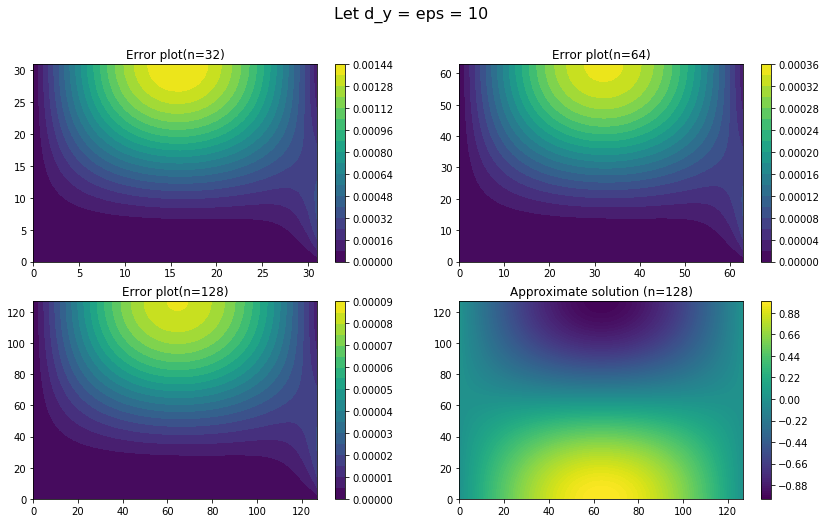

In [27]:
sde.plot(
    f,
    g_d,
    g_n,
    eps=10,
    solver=sde.SDE2,
    mode=1,
    n=[32, 64, 128],
    to="Report/pictures/plot(10).png",
)

### Eps = 100; order = 2:

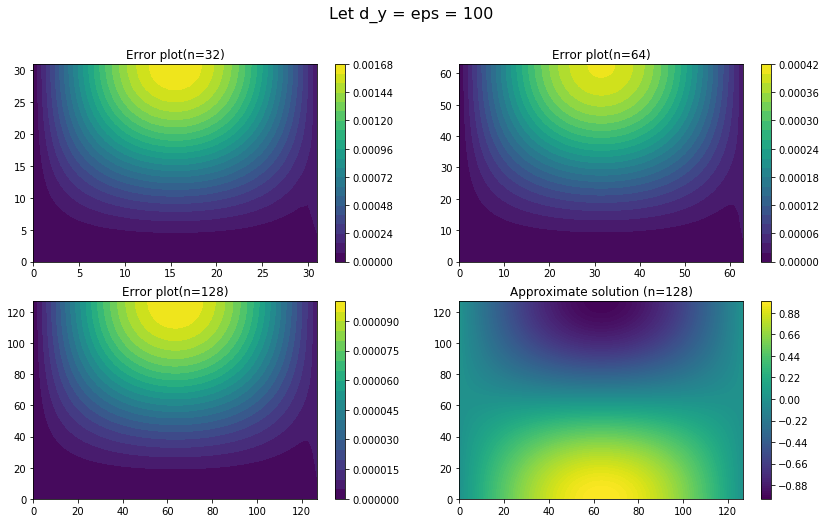

In [28]:
sde.plot(
    f,
    g_d,
    g_n,
    eps=100,
    solver=sde.SDE2,
    mode=1,
    n=[32, 64, 128],
    to="Report/pictures/plot(100).png",
)

### Eps = 100; order = 1:

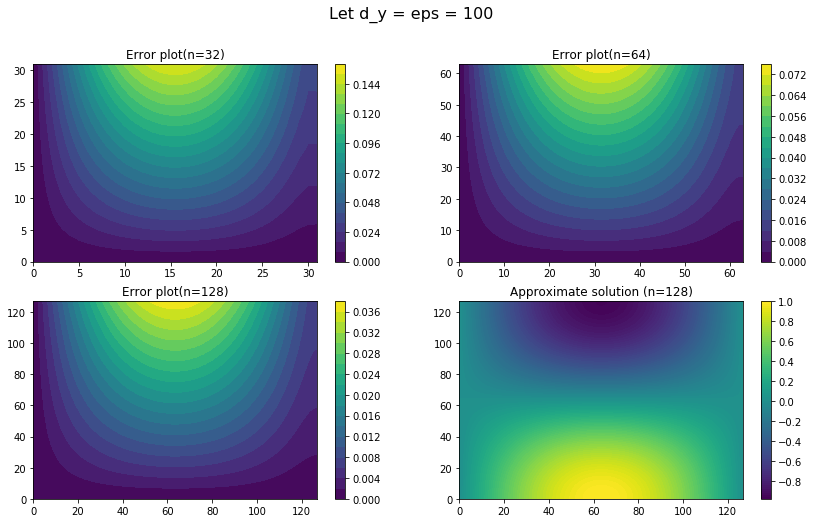

In [29]:
sde.plot(
    f,
    g_d,
    g_n, 
    eps=100,
    solver=sde.SDE,
    mode=1, 
    n=[32, 64, 128],
    to="Report/pictures/plot(100_1).png",
)

## Let us find number of iterations and norms:

In [30]:
actor = sde.Act(f, g_d, g_n)

### Eps = 1, order 2:

In [48]:
actor.act_norms(
    sde.SDE2, eps=1,
    n=32, mode=1,
    tol=1e-08, maxiter=560
)

Iterations number:  560
Ch norm = 0.0007874017555871138;
L2h norm = 7.693223271585302e-05


In [68]:
actor.act_norms(
    sde.SDE2, eps=1,
    n=64, mode=1, 
    tol=1e-08, maxiter=1320
)

Iterations number:  1320
Ch norm = 0.00019051940268988155;
L2h norm = 1.8580648252625047e-05


In [62]:
actor.act_norms(
    sde.SDE2, eps=1,
    n=128, mode=1, 
    tol=1e-08, maxiter=2950
)

Iterations number:  2950
Ch norm = 4.689147740255528e-05;
L2h norm = 4.5676191248498625e-06


### Eps = 10, order 2:

In [78]:
actor.act_norms(
    sde.SDE2, eps=10,
    n=32, mode=1, 
    tol=1e-08, maxiter=840
)

Iterations number:  840
Ch norm = 0.0014357027580448323;
L2h norm = 0.00015617450786011052


In [88]:
actor.act_norms(
    sde.SDE2, eps=10,
    n=64, mode=1, 
    tol=1e-08, maxiter=2711
)

Iterations number:  2711
Ch norm = 0.00034757552525421787;
L2h norm = 3.774655326721207e-05


In [90]:
actor.act_norms(
    sde.SDE2, eps=10,
    n=128, mode=1, 
    tol=1e-08, maxiter=8000
)

Iterations number:  8000
Ch norm = 8.551735898032486e-05;
L2h norm = 9.281538801243062e-06


### Eps = 100, order 2:

In [97]:
actor.act_norms(
    sde.SDE2, eps=100,
    n=32, mode=1, 
    tol=1e-08, maxiter=1520
)

Iterations number:  1520
Ch norm = 0.0016699452714604712;
L2h norm = 0.00018297134927201857


In [108]:
actor.act_norms(
    sde.SDE2, eps=100,
    n=64, mode=1, 
    tol=1e-08, maxiter=5820
)

Iterations number:  5820
Ch norm = 0.0004045574823192677;
L2h norm = 4.4223211778791274e-05


In [117]:
actor.act_norms(
    sde.SDE2, eps=100,
    n=128, mode=1, 
    tol=1e-08, maxiter=19510
)

Iterations number:  19510
Ch norm = 9.956877831407418e-05;
L2h norm = 1.0874287181118243e-05


### Eps = 100, order 1:

In [126]:
actor.act_norms(
    sde.SDE, eps=100,
    n=32, mode=1, 
    tol=1e-08, maxiter= 875
)

Iterations number:  875
Ch norm = 0.15253376365884297;
L2h norm = 0.015801122494847077


In [130]:
actor.act_norms(
    sde.SDE, eps=100,
    n=64, mode=1, 
    tol=1e-08, maxiter=2000
)

Iterations number:  2000
Ch norm = 0.07548625013826182;
L2h norm = 0.007792116444350492


In [135]:
actor.act_norms(
    sde.SDE, eps=100,
    n=128, mode=1, 
    tol=1e-08, maxiter=5005
)

Iterations number:  5005
Ch norm = 0.03754118630075298;
L2h norm = 0.003869987542283795
